# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [20]:
#Type your code here

import pandas as pd
import seaborn as sns
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

#Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


# **2. Memuat Dataset dari Hasil Clustering**
Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
# Gunakan dataset hasil clustering yang memiliki fitur Target
# Silakan gunakan dataset data_clustering jika tidak menerapkan Interpretasi Hasil Clustering [Advanced]
# Silakan gunakan dataset data_clustering_inverse jika menerapkan Interpretasi Hasil Clustering [Advanced]
# Lengkapi kode berikut
# ___ = pd_read_csv("___.csv")

df = pd.read_csv("data_clustering_inverse.csv")

In [3]:
# Tampilkan 5 baris pertama dengan function head.

df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AgeGroup,AmountGroup,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,1.965517,Doctor,34.898496,4315.956541,119.400860,2024-11-04 08:08:08,1,1,3
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,1.898863,Doctor,50.170541,4315.956541,274.852803,2024-11-04 08:09:35,1,0,3
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,0.265832,Student,28.535144,4315.956541,47.670432,2024-11-04 08:07:04,3,2,0
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,0.499122,Student,20.644587,4315.956541,181.548737,2024-11-04 08:09:06,3,2,3
4,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,0.232505,Student,58.061098,4315.956541,41.545804,2024-11-04 08:06:36,3,1,3


# **3. Data Splitting**
Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [4]:
# Menggunakan train_test_split() untuk melakukan pembagian dataset.

'''# Tentukan fitur dan target
X = df.drop(columns=['Target'])
y = df['Target']

# Lakukan train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,          # 20% data untuk testing
    random_state=42,        # agar hasil reproducible
    stratify=y              # jaga distribusi label tetap seimbang
)

# Hapus kolom datetime agar bisa digunakan model Decision Tree
X_train = X_train.drop(columns=['TransactionDate', 'PreviousTransactionDate'])
X_test = X_test.drop(columns=['TransactionDate', 'PreviousTransactionDate'])

# Cek jumlah data pada tiap subset
print("Jumlah data training:", X_train.shape[0])
print("Jumlah data testing:", X_test.shape[0])

# Tampilkan 5 baris pertama dari data training
X_train.head()'''

'# Tentukan fitur dan target\nX = df.drop(columns=[\'Target\'])\ny = df[\'Target\']\n\n# Lakukan train-test split\nX_train, X_test, y_train, y_test = train_test_split(\n    X, y,\n    test_size=0.2,          # 20% data untuk testing\n    random_state=42,        # agar hasil reproducible\n    stratify=y              # jaga distribusi label tetap seimbang\n)\n\n# Hapus kolom datetime agar bisa digunakan model Decision Tree\nX_train = X_train.drop(columns=[\'TransactionDate\', \'PreviousTransactionDate\'])\nX_test = X_test.drop(columns=[\'TransactionDate\', \'PreviousTransactionDate\'])\n\n# Cek jumlah data pada tiap subset\nprint("Jumlah data training:", X_train.shape[0])\nprint("Jumlah data testing:", X_test.shape[0])\n\n# Tampilkan 5 baris pertama dari data training\nX_train.head()'

In [5]:
# Copy dataframe
df_encoded = df.copy()

# --- 1. Encode datetime langsung ke angka (timestamp) ---
datetime_cols = ['TransactionDate', 'PreviousTransactionDate']
for col in datetime_cols:
    df_encoded[col] = pd.to_datetime(df_encoded[col])      # pastikan datetime
    df_encoded[col] = df_encoded[col].astype('int64') // 10**9   # konversi ke detik epoch

# --- 2. Encode semua kolom kategorikal ---
cat_cols = df_encoded.select_dtypes(include='object').columns
le_dict = {}

for col in cat_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    le_dict[col] = le   # simpan encoder jika perlu inverse_transform

# --- 3. Pisahkan fitur & target ---
X = df_encoded.drop(columns=['Target'])
y = df_encoded['Target']

# --- 4. Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# --- 5. Cek hasil ---
print("Jumlah data training:", X_train.shape[0])
print("Jumlah data testing:", X_test.shape[0])
print("\nContoh data hasil encoding:")
X_train.head()

Jumlah data training: 1746
Jumlah data testing: 437

Contoh data hasil encoding:


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AgeGroup,AmountGroup
1260,105.37,1683829880,1,34,0,0.465795,3,55.006689,4315.956541,46.703205,1730707784,3,1
31,124.76,1697473976,1,39,1,1.265647,1,25.735269,4315.956541,131.131803,1730707583,2,2
544,9.83,1690218257,1,22,0,0.432468,3,36.171166,4315.956541,39.473639,1730707743,3,1
668,101.19,1701283121,0,10,2,1.765554,0,33.371291,4315.956541,286.188766,1730707784,1,1
1034,292.08,1703873224,1,8,0,2.032172,2,22.426326,4315.956541,170.427793,1730707774,1,2


# **4. Membangun Model Klasifikasi**
Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Menggunakan algoritma klasifikasi yaitu Decision Tree.
2. Latih model menggunakan data yang sudah dipisah.

=== Accuracy ===
1.0000

=== Confusion Matrix ===
          Predicted 0  Predicted 1  Predicted 2  Predicted 3
Actual 0          109            0            0            0
Actual 1            0          109            0            0
Actual 2            0            0          107            0
Actual 3            0            0            0          112


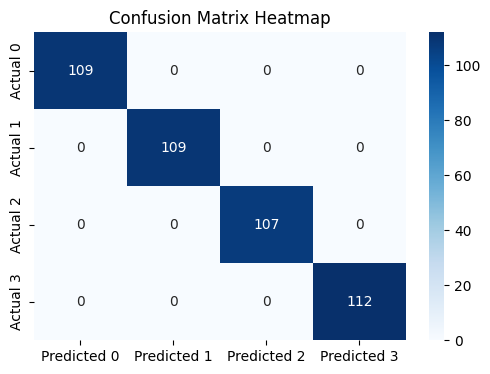


=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00       109
           2       1.00      1.00      1.00       107
           3       1.00      1.00      1.00       112

    accuracy                           1.00       437
   macro avg       1.00      1.00      1.00       437
weighted avg       1.00      1.00      1.00       437



In [8]:
# --- 6. Buat model Decision Tree ---
dt_model = DecisionTreeClassifier(
    criterion='gini',       # bisa juga 'entropy'
    max_depth=None,         # biarkan tree berkembang sampai semua leaf murni
    random_state=42
)

# Latih model
dt_model.fit(X_train, y_train)

# Prediksi pada data testing
y_pred = dt_model.predict(X_test)

# --- 7. Evaluasi model ---
print("=== Accuracy ===")
print(f"{accuracy_score(y_test, y_pred):.4f}")

print("\n=== Confusion Matrix ===")
cm = confusion_matrix(y_test, y_pred)

# Biar lebih rapi → jadikan DataFrame
cm_df = pd.DataFrame(
    cm,
    index=[f"Actual {cls}" for cls in dt_model.classes_],
    columns=[f"Predicted {cls}" for cls in dt_model.classes_]
)
print(cm_df)

# Visualisasi heatmap confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix Heatmap")
plt.show()

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

In [9]:
# Menyimpan Model
# import joblib
# joblib.dump(model, 'decision_tree_model.h5')
joblib.dump(dt_model, 'decision_tree_model.h5')
print("\nModel Decision Tree berhasil disimpan sebagai 'decision_tree_model.h5'")


Model Decision Tree berhasil disimpan sebagai 'decision_tree_model.h5'


# **5. Memenuhi Kriteria Skilled dan Advanced dalam Membangun Model Klasifikasi**



**Biarkan kosong jika tidak menerapkan kriteria skilled atau advanced**

In [14]:
# Melatih model menggunakan algoritma klasifikasi scikit-learn selain Decision Tree.
# --- Train semua model ---
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

log_model = LogisticRegression(max_iter=500, random_state=42)
log_model.fit(X_train, y_train)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)

et_model = ExtraTreesClassifier(random_state=42)
et_model.fit(X_train, y_train)

print("✅ Semua model sudah selesai dilatih.")


✅ Semua model sudah selesai dilatih.


In [15]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada seluruh algoritma yang sudah dibuat.

# Dictionary hasil evaluasi
results = {}

# Fungsi evaluasi
def evaluate_metrics(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

    results[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1-Score": report["weighted avg"]["f1-score"],
        "Support": report["weighted avg"]["support"]
    }

# --- Evaluasi semua model ---
evaluate_metrics(rf_model, X_test, y_test, "Random Forest")
evaluate_metrics(log_model, X_test, y_test, "Logistic Regression")
evaluate_metrics(knn_model, X_test, y_test, "KNN")
evaluate_metrics(svm_model, X_test, y_test, "SVM")
evaluate_metrics(nb_model, X_test, y_test, "Naive Bayes")
evaluate_metrics(gb_model, X_test, y_test, "Gradient Boosting")
evaluate_metrics(ada_model, X_test, y_test, "AdaBoost")
evaluate_metrics(et_model, X_test, y_test, "Extra Trees")

# DataFrame hasil evaluasi
results_df = pd.DataFrame(results).T
results_df = results_df.round(4)

results_df

,Accuracy,Precision,Recall,F1-Score,Support
Random Forest,0.9886,0.9891,0.9886,0.9885,437.0
Logistic Regression,0.2700,0.3949,0.2700,0.1324,437.0
KNN,0.9954,0.9955,0.9954,0.9954,437.0
SVM,0.2700,0.3949,0.2700,0.1324,437.0
Naive Bayes,0.8215,0.8741,0.8215,0.8058,437.0
Gradient Boosting,1.0000,1.0000,1.0000,1.0000,437.0
AdaBoost,0.7506,0.6242,0.7506,0.6667,437.0
Extra Trees,0.9222,0.9235,0.9222,0.9224,437.0


In [16]:
# Menyimpan Model Selain Decision Tree
# Model ini bisa lebih dari satu
# import joblib
# joblib.dump(___, 'explore_<Nama Algoritma>_classification.h5')
# Simpan Random Forest

joblib.dump(rf_model, 'explore_random_forest_classification.h5')

# Simpan KNN
joblib.dump(knn_model, 'explore_knn_classification.h5')

# Simpan Gradient Boosting
joblib.dump(gb_model, 'explore_gradient_boosting_classification.h5')

# Simpan Extra Trees
joblib.dump(et_model, 'explore_extra_trees_classification.h5')

print("✅ Model berhasil disimpan dalam format .h5")

✅ Model berhasil disimpan dalam format .h5


Hyperparameter Tuning Model

Pilih salah satu algoritma yang ingin Anda tuning

In [21]:
# Lakukan Hyperparameter Tuning dan Latih ulang.
# Lakukan dalam satu cell ini saja.

# --- Hyperparameter Tuning untuk Random Forest ---
param_grid = {
    'n_estimators': [100, 200, 300],   # jumlah pohon
    'max_depth': [None, 10, 20, 30],   # kedalaman pohon
    'min_samples_split': [2, 5, 10],   # minimal data per split
    'min_samples_leaf': [1, 2, 4],     # minimal data per daun
    'max_features': ['sqrt', 'log2']   # cara memilih fitur terbaik
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Latih GridSearchCV
grid_search.fit(X_train, y_train)

# Model terbaik
best_rf_model = grid_search.best_estimator_

print("✅ Hyperparameter Tuning Selesai")
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

# --- Latih ulang dengan model terbaik ---
best_rf_model.fit(X_train, y_train)
y_pred = best_rf_model.predict(X_test)





Fitting 5 folds for each of 216 candidates, totalling 1080 fits
✅ Hyperparameter Tuning Selesai
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Score: 0.9896897257470323

=== Evaluasi Model Random Forest (Best Params) ===
Accuracy: 0.988558352402746

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       0.96      1.00      0.98       109
           2       1.00      0.95      0.98       107
           3       1.00      1.00      1.00       112

    accuracy                           0.99       437
   macro avg       0.99      0.99      0.99       437
weighted avg       0.99      0.99      0.99       437



In [23]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada algoritma yang sudah dituning.

print("\n=== Evaluasi Model Random Forest (Best Params) ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


=== Evaluasi Model Random Forest (Best Params) ===
Accuracy: 0.988558352402746

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       0.96      1.00      0.98       109
           2       1.00      0.95      0.98       107
           3       1.00      1.00      1.00       112

    accuracy                           0.99       437
   macro avg       0.99      0.99      0.99       437
weighted avg       0.99      0.99      0.99       437



In [24]:
# Menyimpan Model hasil tuning
# import joblib
# joblib.dump(__, 'tuning_classification.h5')

joblib.dump(best_rf_model, 'tuning_classification.h5')

print("✅ Model hasil tuning berhasil disimpan sebagai 'tuning_classification.h5'")

✅ Model hasil tuning berhasil disimpan sebagai 'tuning_classification.h5'


End of Code